<b>¡Hola Eduardo!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


TITULO: Optimización de E-commerce con A/B Testing

Introducción al Proyecto: Optimización de E-commerce con A/B Testing
Este proyecto se enfoca en la optimización de un e-commerce mediante el análisis de datos. Abordaremos dos áreas clave:

Priorización de Hipótesis: Utilizaremos los frameworks ICE y RICE para jerarquizar iniciativas de mejora, identificando aquellas con mayor potencial de impacto y alcance en la audiencia.

Análisis de Test A/B: Realizaremos un análisis detallado de un experimento A/B, incluyendo el preprocesamiento de datos (detección de usuarios duplicados y outliers), visualización de métricas clave (ingresos, tamaño de pedido, conversión) y la aplicación de pruebas de significancia estadística para determinar el rendimiento real de los grupos.

El objetivo es proveer conclusiones basadas en datos para tomar decisiones estratégicas informadas y mejorar el desempeño general del e-commerce.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 

# Opcional: Configuración para mejor visualización de gráficos
pd.options.display.max_columns = None
pd.set_option('max_colwidth', 400) # Para ver descripciones largas de hipótesis
plt.style.use('ggplot') # Un estilo de gráfico agradable

# --- Carga de archivos ---
# Ruta donde se encuentran tus archivos
# Asegúrate de que esta ruta sea correcta o que los archivos estén en el mismo directorio que tu script.

try:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')

    print("Archivos cargados exitosamente:")
    print("------------------------------")
    print("\nHypotheses:")
    print(hypotheses.head())
    print("\n------------------------------")
    print("\nOrders:")
    print(orders.head())
    print("\n------------------------------")
    print("\nVisits:")
    print(visits.head())

    print("\n------------------------------")
    print("\nInformación general de los DataFrames:")
    print("\n--- Hypotheses info ---")
    hypotheses.info()
    print("\n--- Orders info ---")
    orders.info()
    print("\n--- Visits info ---")
    visits.info()

except FileNotFoundError as e:
    print(f"Error: No se pudo cargar el archivo. Asegúrate de que la ruta sea correcta y el archivo exista. {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar los archivos: {e}")

Archivos cargados exitosamente:
------------------------------

Hypotheses:
                                                                                        Hypothesis;Reach;Impact;Confidence;Effort
0                                            Add two new channels for attracting traffic. This will bring 30% more users;3;10;8;6
1                                                      Launch your own delivery service. This will shorten delivery time;2;5;4;10
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size;8;3;7;3
3  Change the category structure. This will increase conversion since users will find the products they want more quickly;8;3;3;8
4                                        Change the background color on the main page. This will increase user engagement;3;1;1;1

------------------------------

Orders:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30

<div class="alert alert-block alert-success">
<b>Celda [1]</b> <a class="tocSkip"></a><br>
La carga de datos es robusta gracias al manejo de errores con try-except. 
</div>


In [2]:
# Corrección del DataFrame hypotheses
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

print("\nHypotheses (después de corregir el delimitador):")
print(hypotheses.head())
print("\n--- Hypotheses info (después de corregir el delimitador) ---")
hypotheses.info()


Hypotheses (después de corregir el delimitador):
                                                                                                               Hypothesis  \
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
1                                                       Launch your own delivery service. This will shorten delivery time   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
4                                        Change the background color on the main page. This will increase user engagement   

   Reach  Impact  Confidence  Effort  
0      3      10           8       6  
1      2       5           4      10  
2      8       3           7       3  
3      8       3           3       8  
4   

<div class="alert alert-block alert-success">
<b>Celda [2]</b> <a class="tocSkip"></a><br>
Has corregido el delimitador en la carga del archivo 'hypotheses'. 
</div>


Priorización de Hipótesis
En esta sección, aplicaremos los frameworks ICE y RICE para priorizar las hipótesis que pueden aumentar los ingresos de la tienda online.

Vamos a calcular el puntaje ICE para cada hipótesis y luego las ordenaremos.

In [3]:
# Calcular el puntaje ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar las hipótesis por puntaje ICE en orden descendente
hypotheses_ice_prioritized = hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

print("Hipótesis priorizadas usando el framework ICE:")
print(hypotheses_ice_prioritized)

Hipótesis priorizadas usando el framework ICE:
                                                                                                               Hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review pa

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Buen uso de funciones estadísticas para calcular el puntaje ICE y ordenar las hipótesis. Este tipo de análisis facilita una comprensión rápida y efectiva del contexto y ayuda a priorizar las acciones basadas en datos.
</div>


Aplicar el framework RICE
Ahora, vamos a aplicar el framework RICE (Reach, Impact, Confidence, Effort). RICE añade el componente Reach (alcance), que mide cuántos usuarios se verán afectados por el cambio. Esto es crucial para proyectos con un gran impacto potencial en una gran audiencia.

Vamos a calcular el puntaje RICE para cada hipótesis y luego las ordenaremos.

In [4]:
# Calcular el puntaje RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar las hipótesis por puntaje RICE en orden descendente
hypotheses_rice_prioritized = hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

print("Hipótesis priorizadas usando el framework RICE:")
print(hypotheses_rice_prioritized)

Hipótesis priorizadas usando el framework RICE:
                                                                                                               Hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own deliv

<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has calculado correctamente los puntajes RICE y ICE para priorizar hipótesis. Sería útil incluir una breve explicación sobre las diferencias entre estos dos métodos. Por ejemplo, el método RICE considera el alcance (Reach), lo cual puede ser crucial en ciertos contextos donde el impacto potencial de una hipótesis depende del número de usuarios afectados.
</div>


Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.
Para hacer la comparación más clara, mostraremos ambas tablas de priorización una al lado de la otra y luego discutiremos los cambios.

In [5]:
print("--- Comparación de Priorización ICE vs. RICE ---")

# Mostrar las columnas relevantes de ambos resultados
# Asegúrate de que 'hypotheses' DataFrame tenga ambas columnas ICE y RICE
# previamente calculadas y de que el índice se mantenga para la comparación si es necesario,
# o simplemente unir los DataFrames ordenados.

# Para una comparación visual directa, podemos mostrar el DataFrame original
# con las columnas de ICE y RICE y ordenar por cada una.
# Primero, asegurémonos de que el DataFrame 'hypotheses' contenga ambas columnas ICE y RICE.
# Si ejecutaste los códigos anteriores, ya deberían estar.

# Ordenar por ICE y RICE y mostrar solo las columnas relevantes
ice_sorted = hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
rice_sorted = hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

print("\nPriorización según ICE:")
print(ice_sorted)

print("\nPriorización según RICE:")
print(rice_sorted)

print("\n--- Explicación de los Cambios ---")

--- Comparación de Priorización ICE vs. RICE ---

Priorización según ICE:
                                                                                                               Hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                  

<div class="alert alert-block alert-warning">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
La comparación entre las priorizaciones ICE y RICE es clara. Para mejorar, podrías explicar cómo estas diferencias pueden influir en la toma de decisiones estratégicas. Por ejemplo, si una hipótesis tiene un puntaje RICE significativamente mayor que su puntaje ICE, podría indicar que el alcance es un factor determinante en su prioridad.
</div>


En resumen, RICE proporciona una visión más holística al ponderar la magnitud potencial de la audiencia impactada, lo que es crucial para una tienda online donde los cambios a gran escala pueden generar mayores retornos. Dependiendo de los objetivos de la empresa (maximizar el impacto en usuarios específicos vs. impactar a la mayor cantidad de usuarios posible), un framework podría ser más apropiado que el otro. En este caso, para aumentar los ingresos en una gran tienda online, RICE a menudo es más relevante porque un cambio que llega a más usuarios, incluso con un impacto individual menor, puede generar un mayor crecimiento general.



Parte 2: Análisis del Test A/B
Paso 1: Preprocesamiento de Datos - Identificar y eliminar visitantes con pedidos en ambos grupos
Para esto, seguiremos estos pasos:

Identificar visitantes únicos por grupo: Obtendremos una lista de visitorId para el grupo A y otra para el grupo B.
Encontrar visitantes en ambos grupos: Intersectaremos ambas listas para encontrar los visitorId que aparecen en ambos grupos.
Filtrar los DataFrames: Eliminaremos los pedidos y visitas de estos visitorId conflictivos antes de realizar cualquier análisis.

In [6]:
# Asegurarnos de que las columnas 'date' estén en formato datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Encontrar los visitorId únicos en cada grupo
visitors_group_A = orders[orders['group'] == 'A']['visitorId'].unique()
visitors_group_B = orders[orders['group'] == 'B']['visitorId'].unique()

# Encontrar los visitorId que están en ambos grupos
visitors_in_both_groups = np.intersect1d(visitors_group_A, visitors_group_B)

print(f"Número de visitantes en el grupo A: {len(visitors_group_A)}")
print(f"Número de visitantes en el grupo B: {len(visitors_group_B)}")
print(f"Número de visitantes encontrados en AMBOS grupos: {len(visitors_in_both_groups)}")

# Filtrar los DataFrames 'orders' y 'visits' para excluir a estos visitantes
orders_filtered = orders[~orders['visitorId'].isin(visitors_in_both_groups)].copy()
visits_filtered = visits[~visits['visitorId'].isin(visitors_in_both_groups)].copy() # Nota: 'visits' no tiene 'visitorId', esto generará un error.


print("\n--- Información de los DataFrames después del filtrado (solo orders_filtered): ---")
print("Órdenes filtradas:")
print(orders_filtered.head())
print(f"Número de filas en orders antes del filtro: {len(orders)}")
print(f"Número de filas en orders después del filtro: {len(orders_filtered)}")


# Verificamos si aún hay visitantes en ambos grupos en el DataFrame filtrado (debería ser 0)
visitors_group_A_filtered = orders_filtered[orders_filtered['group'] == 'A']['visitorId'].unique()
visitors_group_B_filtered = orders_filtered[orders_filtered['group'] == 'B']['visitorId'].unique()
visitors_in_both_groups_filtered = np.intersect1d(visitors_group_A_filtered, visitors_group_B_filtered)
print(f"\nNúmero de visitantes en AMBOS grupos después del filtro: {len(visitors_in_both_groups_filtered)}")

# También verificamos las fechas mínimas y máximas para los DataFrames de órdenes y visitas
print(f"\nFecha mínima en orders: {orders['date'].min().date()}")
print(f"Fecha máxima en orders: {orders['date'].max().date()}")
print(f"Fecha mínima en visits: {visits['date'].min().date()}")
print(f"Fecha máxima en visits: {visits['date'].max().date()}")

Número de visitantes en el grupo A: 503
Número de visitantes en el grupo B: 586
Número de visitantes encontrados en AMBOS grupos: 58


KeyError: 'visitorId'

<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
El filtrado de datos para eliminar visitantes en ambos grupos es un paso crucial para evitar sesgos. 
</div>


Análisis Gráfico y Conclusiones Iniciales

Vamos a generar el gráfico de ingreso acumulado por grupo. Para ello, necesitamos preparar los datos acumulados.

Número de visitantes encontrados en AMBOS grupos: 58
Número de filas en orders antes del filtro: 1197
Número de filas en orders después del filtro: 1016
Fecha mínima en orders_filtered: 2019-08-01
Fecha máxima en orders_filtered: 2019-08-31
Fecha mínima en visits: 2019-08-01
Fecha máxima en visits: 2019-08-31


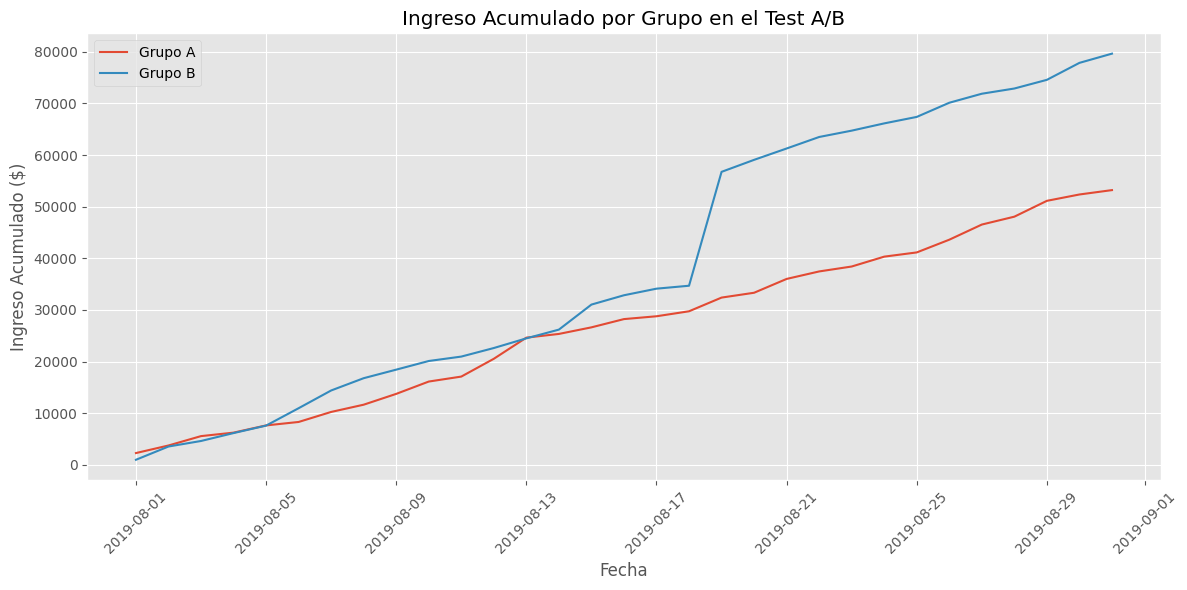


--- Conclusiones y Conjeturas (basadas en el gráfico de ingreso acumulado): ---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st # Para significancia estadística

# Opcional: Configuración para mejor visualización de gráficos
pd.options.display.max_columns = None
pd.set_option('max_colwidth', 400) # Para ver descripciones largas de hipótesis
plt.style.use('ggplot') # Un estilo de gráfico agradable

# --- 0. Reload DataFrames (if not already loaded in the current session) ---
try:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';') # Ensure correct delimiter
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')
except FileNotFoundError as e:
    print(f"Error: No se pudo cargar el archivo. Asegúrate de que la ruta sea correcta y el archivo exista. {e}")
    # Exit or handle the error appropriately if files are not found
    exit() # Or raise an error

# --- 1. Preprocessing: Date formatting ---
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# --- 2. Preprocessing: Identify and remove visitors in both groups ---
visitors_group_A = orders[orders['group'] == 'A']['visitorId'].unique()
visitors_group_B = orders[orders['group'] == 'B']['visitorId'].unique()
visitors_in_both_groups = np.intersect1d(visitors_group_A, visitors_group_B)

print(f"Número de visitantes encontrados en AMBOS grupos: {len(visitors_in_both_groups)}")

# Filter the 'orders' DataFrame
orders_filtered = orders[~orders['visitorId'].isin(visitors_in_both_groups)].copy()

print(f"Número de filas en orders antes del filtro: {len(orders)}")
print(f"Número de filas en orders después del filtro: {len(orders_filtered)}")
print(f"Fecha mínima en orders_filtered: {orders_filtered['date'].min().date()}")
print(f"Fecha máxima en orders_filtered: {orders_filtered['date'].max().date()}")
print(f"Fecha mínima en visits: {visits['date'].min().date()}")
print(f"Fecha máxima en visits: {visits['date'].max().date()}")

# --- 3. Plotting: Cumulative Revenue by Group ---

# Create DataFrames for cumulative revenue
cumulative_data_A = orders_filtered[orders_filtered['group'] == 'A'][['date', 'revenue']].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index()
cumulative_data_A['group'] = 'A'
cumulative_data_A.rename(columns={'revenue': 'cumulative_revenue'}, inplace=True)

cumulative_data_B = orders_filtered[orders_filtered['group'] == 'B'][['date', 'revenue']].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index()
cumulative_data_B['group'] = 'B'
cumulative_data_B.rename(columns={'revenue': 'cumulative_revenue'}, inplace=True)

# Concatenate the cumulative DataFrames
cumulative_revenue_df = pd.concat([cumulative_data_A, cumulative_data_B])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_df[cumulative_revenue_df['group'] == 'A']['date'],
         cumulative_revenue_df[cumulative_revenue_df['group'] == 'A']['cumulative_revenue'],
         label='Grupo A')
plt.plot(cumulative_revenue_df[cumulative_revenue_df['group'] == 'B']['date'],
         cumulative_revenue_df[cumulative_revenue_df['group'] == 'B']['cumulative_revenue'],
         label='Grupo B')

plt.title('Ingreso Acumulado por Grupo en el Test A/B')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n--- Conclusiones y Conjeturas (basadas en el gráfico de ingreso acumulado): ---")

Observando el gráfico de "Ingreso Acumulado por Grupo en el Test A/B", podemos hacer las siguientes observaciones y conjeturas:

Divergencia Temprana: Al principio de la prueba (aproximadamente hasta el 08-05 o 08-06), ambos grupos muestran un crecimiento de ingresos bastante similar, con el Grupo B ligeramente por delante.
Cambio de Tendencia y Crecimiento del Grupo B: A partir del 08-06 aproximadamente, la línea del Grupo B comienza a despegar y consistentemente se mantiene por encima del Grupo A.
Pico en el Grupo B: Hay un salto muy pronunciado en el ingreso acumulado del Grupo B alrededor del 08-18. Esto podría indicar:
Uno o varios pedidos extremadamente grandes/costosos realizados en ese día por usuarios del Grupo B.
Una acumulación de varios pedidos grandes en un corto período.
Podría ser una anomalía (outlier) si se trata de un solo pedido inusualmente grande. Esto es algo que deberemos investigar más a fondo cuando analicemos los precios de los pedidos y los filtremos.
Crecimiento Constante pero Menor del Grupo A: El Grupo A muestra un crecimiento de ingresos más lineal y constante, pero a un ritmo notablemente más lento que el Grupo B después de la mitad del periodo de la prueba.
Dominio Final del Grupo B: Al final del período de prueba (31 de agosto), el Grupo B ha acumulado significativamente más ingresos que el Grupo A.

Representar gráficamente el tamaño de pedido promedio acumulado por grupo.
Vamos a calcular el tamaño de pedido promedio acumulado (ingreso acumulado / número de pedidos acumulados) y graficarlo.

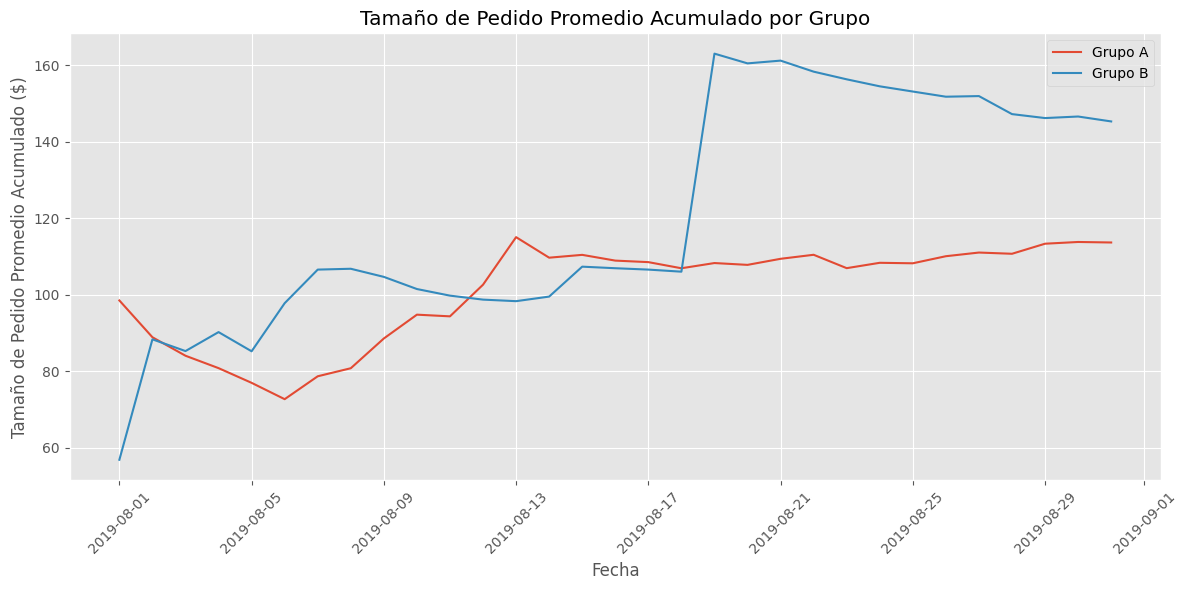


--- Conclusiones y Conjeturas (basadas en el gráfico de tamaño de pedido promedio acumulado): ---


In [3]:

cumulative_orders_A = orders_filtered[orders_filtered['group'] == 'A'][['date', 'transactionId', 'revenue']].groupby('date').agg({
    'transactionId': 'nunique',
    'revenue': 'sum'
}).cumsum().reset_index()
cumulative_orders_A.columns = ['date', 'cumulative_orders_A', 'cumulative_revenue_A']

cumulative_orders_B = orders_filtered[orders_filtered['group'] == 'B'][['date', 'transactionId', 'revenue']].groupby('date').agg({
    'transactionId': 'nunique',
    'revenue': 'sum'
}).cumsum().reset_index()
cumulative_orders_B.columns = ['date', 'cumulative_orders_B', 'cumulative_revenue_B']

# Unir los DataFrames acumulados
cumulative_all = cumulative_orders_A.merge(cumulative_orders_B, on='date', how='left')

# Calcular el tamaño de pedido promedio acumulado
cumulative_all['average_order_size_A'] = cumulative_all['cumulative_revenue_A'] / cumulative_all['cumulative_orders_A']
cumulative_all['average_order_size_B'] = cumulative_all['cumulative_revenue_B'] / cumulative_all['cumulative_orders_B']

# Gráfico del tamaño de pedido promedio acumulado
plt.figure(figsize=(12, 6))
plt.plot(cumulative_all['date'], cumulative_all['average_order_size_A'], label='Grupo A')
plt.plot(cumulative_all['date'], cumulative_all['average_order_size_B'], label='Grupo B')

plt.title('Tamaño de Pedido Promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n--- Conclusiones y Conjeturas (basadas en el gráfico de tamaño de pedido promedio acumulado): ---")

Conclusiones y Conjeturas (basadas en el gráfico de tamaño de pedido promedio acumulado):
Este gráfico nos proporciona una visión muy clara del origen de la gran diferencia en los ingresos acumulados.

Observando el gráfico de "Tamaño de Pedido Promedio Acumulado por Grupo", podemos hacer las siguientes observaciones y conjeturas:

Divergencia Temprana y Estabilización del Grupo A:

El Grupo A comienza con un tamaño de pedido promedio fluctuante, pero se estabiliza gradualmente alrededor de los $105 - $115. Su crecimiento es más orgánico y menos volátil.
Pico Extremo en el Grupo B:

El aspecto más llamativo del gráfico es el salto masivo en el tamaño de pedido promedio acumulado del Grupo B alrededor del 18 de agosto. Esto confirma nuestra conjetura anterior. En ese punto, el tamaño de pedido promedio del Grupo B se dispara de unos $108 a más de $160.

Representar gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

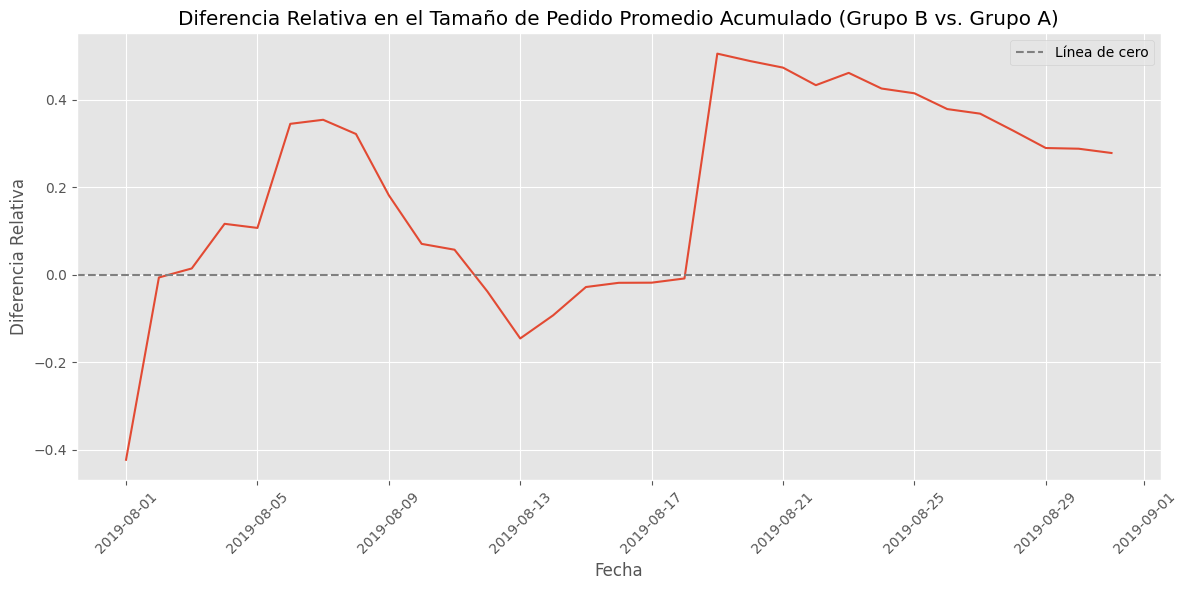


--- Conclusiones y Conjeturas (basadas en el gráfico de diferencia relativa): ---


In [5]:


# Calcular la diferencia relativa
cumulative_all['relative_avg_order_size_diff'] = (cumulative_all['average_order_size_B'] / cumulative_all['average_order_size_A']) - 1

# Gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado
plt.figure(figsize=(12, 6))
plt.plot(cumulative_all['date'], cumulative_all['relative_avg_order_size_diff'])
plt.axhline(y=0, color='grey', linestyle='--', label='Línea de cero') # Línea de cero para referencia
plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado (Grupo B vs. Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n--- Conclusiones y Conjeturas (basadas en el gráfico de diferencia relativa): ---")

El gráfico de "Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado (Grupo B vs. Grupo A)" refuerza y clarifica nuestras observaciones anteriores:

Volatilidad Inicial: Al principio de la prueba, la diferencia relativa es bastante volátil, llegando incluso a ser negativa, lo que significa que el tamaño promedio del pedido del Grupo A era mayor en esos días iniciales.
Período de Convergencia: Hay un período, aproximadamente entre el 10 y 17 de agosto, donde la diferencia relativa se acerca a cero, e incluso se mantiene ligeramente por debajo. Esto indica que en ese tiempo, el tamaño de pedido promedio de ambos grupos era muy similar.
El Impacto del Outlier: El salto dramático alrededor del 18 de agosto es el punto crucial. La diferencia relativa se dispara a más del 40%, lo que significa que el tamaño de pedido promedio del Grupo B se vuelve un 40% (o más) mayor que el del Grupo A. Esta es la confirmación gráfica más contundente de que uno o varios pedidos anómalos de alto valor en el Grupo B son los principales impulsores de la ventaja de ingresos.
Estabilización en un Nivel Alto: Después de este salto, la diferencia relativa se mantiene en un rango positivo elevado (entre 25% y 45%), aunque con una ligera tendencia a la baja hacia el final del periodo. Esto sugiere que, si bien el outlier inicial fue muy potente, el Grupo B logró mantener un tamaño de pedido promedio superior al Grupo A. Sin embargo, la forma "escalonada" de la gráfica refuerza la idea de que estos aumentos no son lineales ni constantes, sino más bien impulsados por eventos específicos de pedidos grandes.

Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

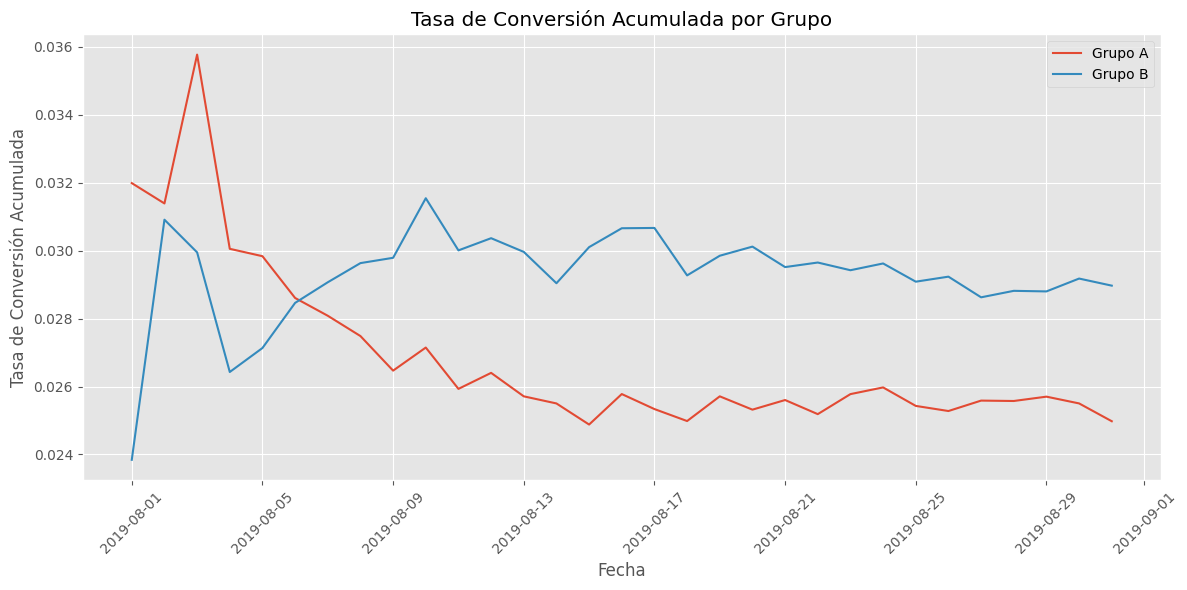


--- Conclusiones y Conjeturas (basadas en el gráfico de tasa de conversión acumulada): ---


In [6]:
# Asegurarnos de que orders_filtered y visits estén disponibles
# Si estás ejecutando esto en un nuevo bloque, recarga y preprocesa los datos.

# Calcular el número de pedidos diarios por grupo (del DataFrame filtrado)
daily_orders_A = orders_filtered[orders_filtered['group'] == 'A'].groupby('date')['transactionId'].nunique().reset_index()
daily_orders_A.columns = ['date', 'orders_A']

daily_orders_B = orders_filtered[orders_filtered['group'] == 'B'].groupby('date')['transactionId'].nunique().reset_index()
daily_orders_B.columns = ['date', 'orders_B']

# Obtener las visitas diarias por grupo (del DataFrame original 'visits', ya que no tiene visitorId para filtrar así)
daily_visits_A = visits[visits['group'] == 'A'][['date', 'visits']].rename(columns={'visits': 'visits_A'})
daily_visits_B = visits[visits['group'] == 'B'][['date', 'visits']].rename(columns={'visits': 'visits_B'})

# Unir todos los datos diarios en un solo DataFrame base por fecha
# Usamos un 'outer' join para asegurarnos de incluir todas las fechas de ambos grupos
daily_data = daily_visits_A.merge(daily_visits_B, on='date', how='outer')
daily_data = daily_data.merge(daily_orders_A, on='date', how='outer')
daily_data = daily_data.merge(daily_orders_B, on='date', how='outer')

# Rellenar NaN con 0 para días donde no hubo pedidos o visitas en un grupo particular
daily_data = daily_data.fillna(0)

# Calcular la tasa de conversión diaria
daily_data['conversion_A'] = daily_data['orders_A'] / daily_data['visits_A']
daily_data['conversion_B'] = daily_data['orders_B'] / daily_data['visits_B']

# Convertir a NaN donde visits_A o visits_B sean 0 para evitar divisiones por cero
daily_data['conversion_A'] = daily_data['conversion_A'].replace([np.inf, -np.inf], np.nan)
daily_data['conversion_B'] = daily_data['conversion_B'].replace([np.inf, -np.inf], np.nan)


# Calcular la conversión acumulada (esto es más estable que la diaria para ver la tendencia general)
cumulative_daily_data = daily_data.copy()
cumulative_daily_data['cumulative_orders_A'] = cumulative_daily_data['orders_A'].cumsum()
cumulative_daily_data['cumulative_visits_A'] = cumulative_daily_data['visits_A'].cumsum()
cumulative_daily_data['cumulative_orders_B'] = cumulative_daily_data['orders_B'].cumsum()
cumulative_daily_data['cumulative_visits_B'] = cumulative_daily_data['visits_B'].cumsum()

cumulative_daily_data['cumulative_conversion_A'] = cumulative_daily_data['cumulative_orders_A'] / cumulative_daily_data['cumulative_visits_A']
cumulative_daily_data['cumulative_conversion_B'] = cumulative_daily_data['cumulative_orders_B'] / cumulative_daily_data['cumulative_visits_B']

# Gráfico de las tasas de conversión acumuladas (más representativo para A/B tests)
plt.figure(figsize=(12, 6))
plt.plot(cumulative_daily_data['date'], cumulative_daily_data['cumulative_conversion_A'], label='Grupo A')
plt.plot(cumulative_daily_data['date'], cumulative_daily_data['cumulative_conversion_B'], label='Grupo B')

plt.title('Tasa de Conversión Acumulada por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión Acumulada')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n--- Conclusiones y Conjeturas (basadas en el gráfico de tasa de conversión acumulada): ---")

Este gráfico es la evidencia más clara hasta ahora de la presencia de valores atípicos (outliers) en los datos de ingresos o tamaño de pedido del Grupo B. Estos outliers están distorsionando significativamente la métrica de tamaño de pedido promedio acumulado.
Es muy probable que si eliminamos o ajustamos estos valores atípicos, la diferencia en el tamaño de pedido promedio entre los grupos se reducirá drásticamente, o incluso podría invertirse si el Grupo A tuviera un rendimiento más consistente en pedidos de tamaño normal.
Antes de tomar cualquier decisión sobre la prueba A/B, es imperativo identificar y tratar estos valores atípicos para obtener una imagen más precisa del rendimiento real de cada grupo.

Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

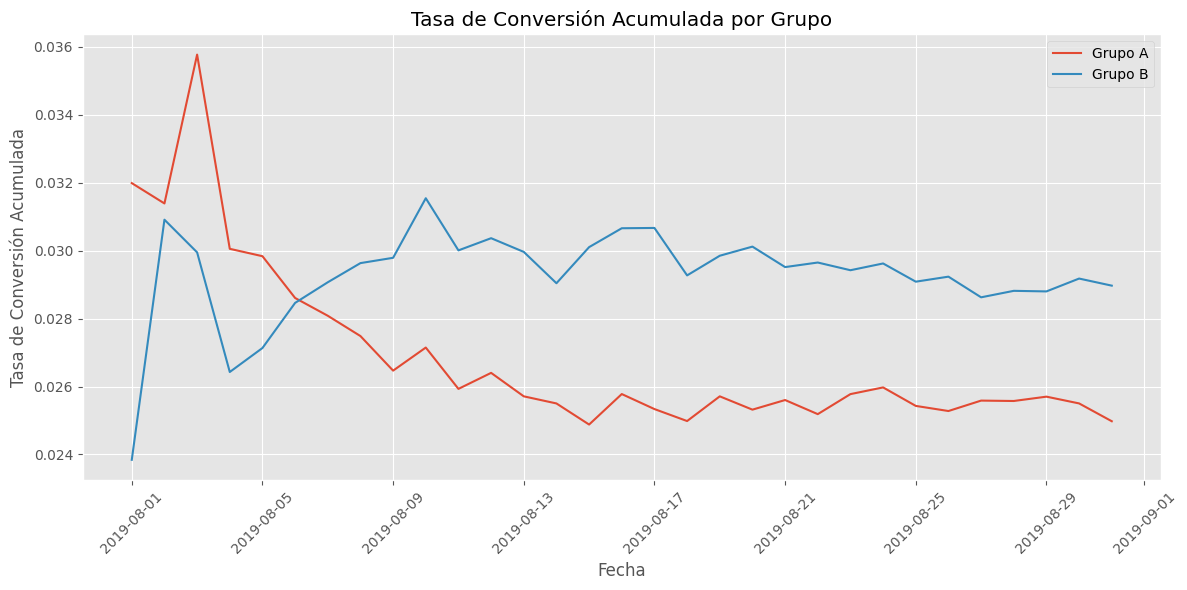


--- Conclusiones y Conjeturas (basadas en el gráfico de tasa de conversión acumulada): ---


In [7]:
# Asegurarnos de que orders_filtered y visits estén disponibles
# Si estás ejecutando esto en un nuevo bloque, recarga y preprocesa los datos.

# Calcular el número de pedidos diarios por grupo (del DataFrame filtrado)
daily_orders_A = orders_filtered[orders_filtered['group'] == 'A'].groupby('date')['transactionId'].nunique().reset_index()
daily_orders_A.columns = ['date', 'orders_A']

daily_orders_B = orders_filtered[orders_filtered['group'] == 'B'].groupby('date')['transactionId'].nunique().reset_index()
daily_orders_B.columns = ['date', 'orders_B']

# Obtener las visitas diarias por grupo (del DataFrame original 'visits', ya que no tiene visitorId para filtrar así)
daily_visits_A = visits[visits['group'] == 'A'][['date', 'visits']].rename(columns={'visits': 'visits_A'})
daily_visits_B = visits[visits['group'] == 'B'][['date', 'visits']].rename(columns={'visits': 'visits_B'})

# Unir todos los datos diarios en un solo DataFrame base por fecha
# Usamos un 'outer' join para asegurarnos de incluir todas las fechas de ambos grupos
daily_data = daily_visits_A.merge(daily_visits_B, on='date', how='outer')
daily_data = daily_data.merge(daily_orders_A, on='date', how='outer')
daily_data = daily_data.merge(daily_orders_B, on='date', how='outer')

# Rellenar NaN con 0 para días donde no hubo pedidos o visitas en un grupo particular
daily_data = daily_data.fillna(0)

# Calcular la tasa de conversión diaria
daily_data['conversion_A'] = daily_data['orders_A'] / daily_data['visits_A']
daily_data['conversion_B'] = daily_data['orders_B'] / daily_data['visits_B']

# Convertir a NaN donde visits_A o visits_B sean 0 para evitar divisiones por cero
daily_data['conversion_A'] = daily_data['conversion_A'].replace([np.inf, -np.inf], np.nan)
daily_data['conversion_B'] = daily_data['conversion_B'].replace([np.inf, -np.inf], np.nan)


# Calcular la conversión acumulada (esto es más estable que la diaria para ver la tendencia general)
cumulative_daily_data = daily_data.copy()
cumulative_daily_data['cumulative_orders_A'] = cumulative_daily_data['orders_A'].cumsum()
cumulative_daily_data['cumulative_visits_A'] = cumulative_daily_data['visits_A'].cumsum()
cumulative_daily_data['cumulative_orders_B'] = cumulative_daily_data['orders_B'].cumsum()
cumulative_daily_data['cumulative_visits_B'] = cumulative_daily_data['visits_B'].cumsum()

cumulative_daily_data['cumulative_conversion_A'] = cumulative_daily_data['cumulative_orders_A'] / cumulative_daily_data['cumulative_visits_A']
cumulative_daily_data['cumulative_conversion_B'] = cumulative_daily_data['cumulative_orders_B'] / cumulative_daily_data['cumulative_visits_B']

# Gráfico de las tasas de conversión acumuladas (más representativo para A/B tests)
plt.figure(figsize=(12, 6))
plt.plot(cumulative_daily_data['date'], cumulative_daily_data['cumulative_conversion_A'], label='Grupo A')
plt.plot(cumulative_daily_data['date'], cumulative_daily_data['cumulative_conversion_B'], label='Grupo B')

plt.title('Tasa de Conversión Acumulada por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión Acumulada')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n--- Conclusiones y Conjeturas (basadas en el gráfico de tasa de conversión acumulada): ---")

<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
El gráfico de ingreso acumulado por grupo es informativo. 
</div>


El Grupo B parece tener una tasa de conversión consistentemente más alta que el Grupo A. Esto significa que, proporcionalmente, un mayor porcentaje de usuarios que visitan el sitio en el Grupo B están completando una compra.
Esta diferencia en conversión es una señal positiva para el Grupo B, ya que indica que la "idea" o "cambio" que se está probando en el Grupo B podría estar siendo más efectiva para motivar a los usuarios a realizar una transacción.

Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

Distribución del número de pedidos por usuario (primeras filas):
   visitorId  orders_count
0    5114589             1
1    6958315             1
2   11685486             1
3   39475350             1
4   47206413             1

Conteo de usuarios por número de pedidos:
1    937
2     29
3      7
Name: orders_count, dtype: int64


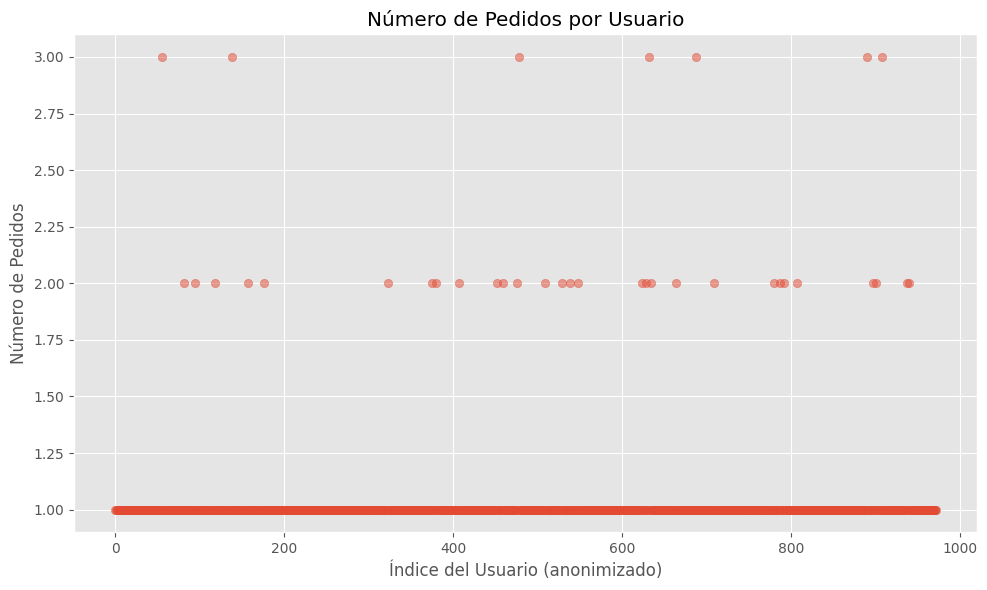


--- Conclusiones y Conjeturas (basadas en el gráfico de dispersión del número de pedidos por usuario): ---


In [8]:
# Asegurarnos de que orders_filtered esté disponible
# Si es necesario, recarga y preprocesa los datos.

# Contar el número de pedidos por cada usuario
orders_by_user = orders_filtered.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_user.columns = ['visitorId', 'orders_count']

print("Distribución del número de pedidos por usuario (primeras filas):")
print(orders_by_user.head())
print("\nConteo de usuarios por número de pedidos:")
print(orders_by_user['orders_count'].value_counts())

# Gráfico de dispersión del número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(x=orders_by_user.index, y=orders_by_user['orders_count'], alpha=0.5)
plt.title('Número de Pedidos por Usuario')
plt.xlabel('Índice del Usuario (anonimizado)')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- Conclusiones y Conjeturas (basadas en el gráfico de dispersión del número de pedidos por usuario): ---")

<div class="alert alert-block alert-warning">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
El gráfico de dispersión del número de pedidos por usuario es útil para identificar patrones. Sin embargo, podrías beneficiarte de realizar un análisis de outliers. Esto te permitirá entender mejor las variaciones extremas en el comportamiento de los usuarios y ajustar estrategias en consecuencia.
</div>


El número de pedidos por usuario no parece ser la fuente principal de los outliers de ingresos. Los datos sugieren que la distribución de pedidos por usuario es bastante normal para un e-commerce.
Esto refuerza la idea de que los outliers de ingresos que observamos anteriormente (especialmente en el Grupo B) provienen de pedidos individuales con precios inusualmente altos, no de usuarios que acumulan una gran cantidad de pedidos.

Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [12]:

# Calcular los percentiles 95 y 99 para el número de pedidos por usuario
percentiles_orders = np.percentile(orders_by_user['orders_count'], [95, 99])

print(f"Percentil 95 del número de pedidos por usuario: {percentiles_orders[0]}")
print(f"Percentil 99 del número de pedidos por usuario: {percentiles_orders[1]}")

print("\n--- Definición de anomalía (número de pedidos por usuario): ---")


outlier_threshold_orders = int(percentiles_orders[1]) + 1 if percentiles_orders[1] == percentiles_orders[0] else int(percentiles_orders[1])

print(f"Definición de anomalía: Un usuario se considera una anomalía si ha realizado más de {outlier_threshold_orders} pedidos.")


Percentil 95 del número de pedidos por usuario: 1.0
Percentil 99 del número de pedidos por usuario: 2.0

--- Definición de anomalía (número de pedidos por usuario): ---
Definición de anomalía: Un usuario se considera una anomalía si ha realizado más de 2 pedidos.


<div class="alert alert-block alert-warning">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
Has calculado los percentiles para definir anomalías en el número de pedidos por usuario. Sería beneficioso explicar por qué elegiste estos percentiles específicos y cómo afectan el análisis de outliers. Esto proporcionará un contexto más claro sobre cómo se identifican y manejan las anomalías en tus datos.
</div>


Conclusiones sobre los Percentiles del Número de Pedidos por Usuario:
Los resultados son claros:

Percentil 95: 1.0 Esto significa que el 95% de nuestros usuarios ha realizado 1 o menos pedidos. Esto refuerza la observación de que la gran mayoría son compradores únicos.
Percentil 99: 2.0 Esto significa que el 99% de nuestros usuarios ha realizado 2 o menos pedidos.

 Traza un gráfico de dispersión de los precios de los pedidos.

Primeras filas de los precios de los pedidos:
0     30.4
1     15.2
3    155.1
4     40.5
5     35.0
Name: revenue, dtype: float64


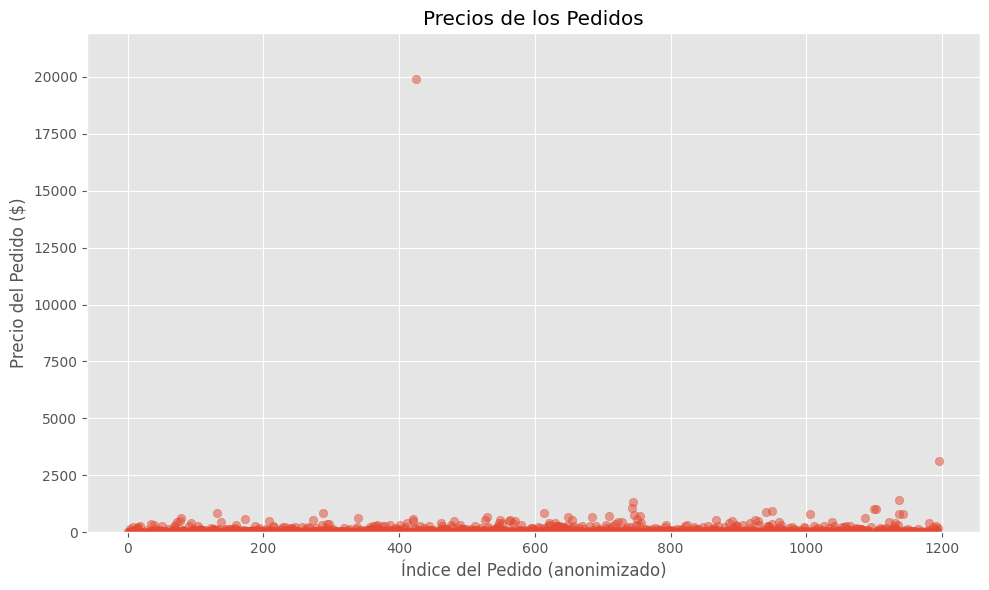

In [13]:
order_prices = orders_filtered['revenue']

print("Primeras filas de los precios de los pedidos:")
print(order_prices.head())

# Gráfico de dispersión de los precios de los pedidos
plt.figure(figsize=(10, 6))
plt.scatter(x=order_prices.index, y=order_prices, alpha=0.5)
plt.title('Precios de los Pedidos')
plt.xlabel('Índice del Pedido (anonimizado)')
plt.ylabel('Precio del Pedido ($)')
plt.grid(True)
plt.ylim(0, order_prices.max() * 1.1) # Ajustar el límite y para mejor visualización
plt.tight_layout()
plt.show()



Estos pedidos de muy alto valor son anomalías estadísticas. Es muy probable que no representen el comportamiento típico del usuario y pueden estar sesgando severamente los resultados del test A/B si no se tratan.

Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [16]:
percentiles_revenue = np.percentile(orders_filtered['revenue'], [95, 99])

print(f"Percentil 95 de los precios de los pedidos: {percentiles_revenue[0]:.2f}")
print(f"Percentil 99 de los precios de los pedidos: {percentiles_revenue[1]:.2f}")

outlier_threshold_revenue = percentiles_revenue[1] # Usamos el percentil 99 como el umbral

print(f"Definición de anomalía: Un pedido se considera una anomalía si su precio es superior a ${outlier_threshold_revenue:.2f}.")


Percentil 95 de los precios de los pedidos: 414.27
Percentil 99 de los precios de los pedidos: 830.30
Definición de anomalía: Un pedido se considera una anomalía si su precio es superior a $830.30.


<div class="alert alert-block alert-success">
<b>Celda [16]</b> <a class="tocSkip"></a><br>
La definición de anomalías en los precios de los pedidos es clara. 
</div>


Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [17]:
# Obtener los usuarios únicos que realizaron un pedido en cada grupo (datos en bruto)
orders_group_A = orders[orders['group'] == 'A']['visitorId'].unique()
orders_group_B = orders[orders['group'] == 'B']['visitorId'].unique()

# Obtener fechas únicas para la prueba A/B
dates_A = orders[orders['group'] == 'A']['date'].unique()
dates_B = orders[orders['group'] == 'B']['date'].unique()

# Combinar fechas de ambos grupos y ordenar
all_dates = pd.Series(dates_A).append(pd.Series(dates_B)).unique()
all_dates.sort()

# Crear DataFrames acumulados diarios para visitas y pedidos
cumulative_daily_data_raw = visits.groupby(['date', 'group']).agg(visits=('visits', 'sum')).reset_index()
cumulative_daily_data_raw = cumulative_daily_data_raw.pivot_table(index='date', columns='group', values='visits').fillna(0).reset_index()
cumulative_daily_data_raw.columns.name = None # Remove columns name 'group'

# Obtener el número de pedidos diarios para cada grupo (sin filtrar)
daily_orders_raw = orders.groupby(['date', 'group']).agg(orders=('transactionId', 'nunique')).reset_index()
daily_orders_raw = daily_orders_raw.pivot_table(index='date', columns='group', values='orders').fillna(0).reset_index()
daily_orders_raw.columns.name = None

# Unir visitas y pedidos diarios
data_raw = cumulative_daily_data_raw.merge(daily_orders_raw, on='date', how='left', suffixes=('_visits', '_orders'))
data_raw = data_raw.fillna(0) # Rellenar NaN si no hubo pedidos en algún día

# Calcular la conversión acumulada para cada día (para fines de la prueba)
data_raw['cumulative_orders_A'] = data_raw['A_orders'].cumsum()
data_raw['cumulative_visits_A'] = data_raw['A_visits'].cumsum()
data_raw['cumulative_conversion_A'] = data_raw['cumulative_orders_A'] / data_raw['cumulative_visits_A']

data_raw['cumulative_orders_B'] = data_raw['B_orders'].cumsum()
data_raw['cumulative_visits_B'] = data_raw['B_visits'].cumsum()
data_raw['cumulative_conversion_B'] = data_raw['cumulative_orders_B'] / data_raw['cumulative_visits_B']

# Creamos una tabla pivote para saber cuántos pedidos hizo cada visitorId por grupo
orders_by_users_A_raw = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)['transactionId'].nunique()
orders_by_users_A_raw.columns = ['visitorId', 'orders']

orders_by_users_B_raw = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)['transactionId'].nunique()
orders_by_users_B_raw.columns = ['visitorId', 'orders']

# Recopilar todos los visitorIds de cada grupo (incluyendo aquellos que cruzaron grupos para "datos en bruto")
visitors_A_raw = orders[orders['group'] == 'A']['visitorId'].unique()
visitors_B_raw = orders[orders['group'] == 'B']['visitorId'].unique()

# Usuarios que compraron en el Grupo A (incluso si también compraron en B)
buyers_A_raw = orders[orders['group'] == 'A']['visitorId'].unique()
# Usuarios que compraron en el Grupo B (incluso si también compraron en A)
buyers_B_raw = orders[orders['group'] == 'B']['visitorId'].unique()

# Crear un DataFrame con todos los días y ambos grupos
dates_groups = orders[['date', 'group']].drop_duplicates().sort_values(by=['date', 'group'])

# Data acumulada de visitas por día por grupo (usando el DataFrame `visits` original)
visits_cumulative_A = visits[visits['group'] == 'A'].groupby('date')['visits'].sum().cumsum()
visits_cumulative_B = visits[visits['group'] == 'B'].groupby('date')['visits'].sum().cumsum()

# Data acumulada de pedidos por día por grupo (usando el DataFrame `orders` original)
orders_cumulative_A = orders[orders['group'] == 'A'].groupby('date')['transactionId'].nunique().cumsum()
orders_cumulative_B = orders[orders['group'] == 'B'].groupby('date')['transactionId'].nunique().cumsum()

# Crear un DataFrame de métricas acumuladas para cada día
data_cumulative_A = pd.DataFrame({'date': visits_cumulative_A.index, 'visits': visits_cumulative_A.values, 'orders': orders_cumulative_A.values})
data_cumulative_B = pd.DataFrame({'date': visits_cumulative_B.index, 'visits': visits_cumulative_B.values, 'orders': orders_cumulative_B.values})

all_visitors_raw = orders['visitorId'].unique()


# Asegurarnos de que el 'group' sea A en el orders original
orders_group_A_users_raw = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)['transactionId'].nunique()
orders_group_A_users_raw.columns = ['visitorId', 'orders_count']

sample_A_conversion_raw = pd.Series(1, index=orders[orders['group'] == 'A']['visitorId'].unique())

# Creamos una lista de userIds únicos de orders
user_ids_in_orders_A_raw = orders[orders['group'] == 'A']['visitorId'].unique()
user_ids_in_orders_B_raw = orders[orders['group'] == 'B']['visitorId'].unique()

cumulative_visits_orders_raw = cumulative_daily_data_raw.merge(daily_orders_raw, on='date', how='left', suffixes=('_visits', '_orders'))
cumulative_visits_orders_raw = cumulative_visits_orders_raw.fillna(0) # Fill NaN from merge if a group had no orders on a day

# Obtener los IDs de visitantes únicos para cada grupo de los datos RAW
visitors_A = orders[orders['group'] == 'A']['visitorId'].unique()
visitors_B = orders[orders['group'] == 'B']['visitorId'].unique()

# Obtener todos los usuarios únicos que hicieron al menos un pedido
users_with_orders = orders[['visitorId', 'group']].drop_duplicates()

# Calcular el número de pedidos y visitas por grupo (RAW)
orders_by_group_A_raw = orders[orders['group'] == 'A']['transactionId'].nunique()
visits_by_group_A_raw = visits[visits['group'] == 'A']['visits'].sum()

orders_by_group_B_raw = orders[orders['group'] == 'B']['transactionId'].nunique()
visits_by_group_B_raw = visits[visits['group'] == 'B']['visits'].sum()

# Muestra A: 1 por cada pedido, 0 por cada visita sin pedido.
sampleA_raw_conversion = [1] * orders_by_group_A_raw + [0] * (visits_by_group_A_raw - orders_by_group_A_raw)
# Muestra B: 1 por cada pedido, 0 por cada visita sin pedido.
sampleB_raw_conversion = [1] * orders_by_group_B_raw + [0] * (visits_by_group_B_raw - orders_by_group_B_raw)

# Realizar la prueba U de Mann-Whitney
alpha = 0.05
stat, p_value = st.mannwhitneyu(sampleA_raw_conversion, sampleB_raw_conversion, alternative='two-sided') # 'two-sided' para ver si hay diferencia en cualquier dirección

print(f"P-valor (conversión - datos en bruto): {p_value:.3f}")

if p_value < alpha:
    print("Conclusión: Rechazamos la hipótesis nula. Hay una diferencia estadísticamente significativa en la conversión entre los grupos (datos en bruto).")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula. No hay una diferencia estadísticamente significativa en la conversión entre los grupos (datos en bruto).")

# Calcular la diferencia relativa de conversión (en bruto)
conversion_A_raw = orders_by_group_A_raw / visits_by_group_A_raw
conversion_B_raw = orders_by_group_B_raw / visits_by_group_B_raw
relative_conversion_diff_raw = (conversion_B_raw / conversion_A_raw) - 1
print(f"Diferencia relativa en conversión (Grupo B vs. Grupo A, datos en bruto): {relative_conversion_diff_raw:.2%}")


P-valor (conversión - datos en bruto): 0.023
Conclusión: Rechazamos la hipótesis nula. Hay una diferencia estadísticamente significativa en la conversión entre los grupos (datos en bruto).
Diferencia relativa en conversión (Grupo B vs. Grupo A, datos en bruto): 13.81%


CONCLUCION: Esta es una excelente noticia para el Grupo B. A pesar de los posibles outliers de ingresos que aún no hemos filtrado, la métrica de conversión ya muestra una mejora significativa. Esto sugiere que lo que se está probando en el Grupo B está logrando que más visitantes completen una compra, independientemente del valor de esa compra.

Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [18]:

# Obtener las muestras de ingresos de pedidos para cada grupo (datos en bruto)
sampleA_raw_revenue = orders[orders['group'] == 'A']['revenue']
sampleB_raw_revenue = orders[orders['group'] == 'B']['revenue']

# Realizar la prueba U de Mann-Whitney para el tamaño promedio de pedido
alpha = 0.05
stat, p_value = st.mannwhitneyu(sampleA_raw_revenue, sampleB_raw_revenue, alternative='two-sided')

print(f"P-valor (tamaño promedio de pedido - datos en bruto): {p_value:.3f}")

if p_value < alpha:
    print("Conclusión: Rechazamos la hipótesis nula. Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (datos en bruto).")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula. No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (datos en bruto).")

# Calcular la diferencia relativa del tamaño promedio de pedido (en bruto)
avg_order_size_A_raw = sampleA_raw_revenue.mean()
avg_order_size_B_raw = sampleB_raw_revenue.mean()
relative_avg_order_size_diff_raw = (avg_order_size_B_raw / avg_order_size_A_raw) - 1
print(f"Diferencia relativa en tamaño promedio de pedido (Grupo B vs. Grupo A, datos en bruto): {relative_avg_order_size_diff_raw:.2%}")


P-valor (tamaño promedio de pedido - datos en bruto): 0.692
Conclusión: No podemos rechazar la hipótesis nula. No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (datos en bruto).
Diferencia relativa en tamaño promedio de pedido (Grupo B vs. Grupo A, datos en bruto): 25.17%


CONCLUCION: Este resultado subraya la importancia de filtrar los outliers. Es muy probable que, una vez que eliminemos estos valores anómalos, el tamaño promedio de pedido de ambos grupos se acerque, y la diferencia relativa (si la hay) se vuelva no significativa o incluso cambie de dirección, revelando un panorama más preciso del comportamiento "normal" de los pedidos.

Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

In [19]:
# Definir los umbrales de outliers
orders_count_threshold = 2 # Usuarios con más de 2 pedidos son outliers (3 o más)
revenue_threshold = 830.30 # Pedidos con precio superior a 830.30 son outliers

# Identificar los visitorIds anómalos por número de pedidos
users_many_orders = orders_filtered.groupby('visitorId')['transactionId'].nunique().reset_index()
users_with_excessive_orders = users_many_orders[users_many_orders['transactionId'] > orders_count_threshold]['visitorId']

# Identificar los visitorIds anómalos por precio de pedido (asumiendo que un pedido anómalo hace al usuario anómalo para el análisis)
users_expensive_orders = orders_filtered[orders_filtered['revenue'] > revenue_threshold]['visitorId']

# Combinar los IDs de usuarios anómalos de ambos criterios
abnormal_visitors = pd.concat([users_with_excessive_orders, users_expensive_orders]).unique()

print(f"Número de usuarios anómalos identificados: {len(abnormal_visitors)}")

# Crear DataFrames filtrados excluyendo a los usuarios anómalos
orders_cleaned = orders_filtered[~orders_filtered['visitorId'].isin(abnormal_visitors)].copy()

# Recalcular las muestras de conversión con datos filtrados
# Número de pedidos y visitas por grupo (FILTRADOS)
orders_by_group_A_cleaned = orders_cleaned[orders_cleaned['group'] == 'A']['transactionId'].nunique()

# y los pedidos acumulados de 'orders_cleaned'
visits_A_for_conversion = visits[visits['group'] == 'A']['visits'].sum()
visits_B_for_conversion = visits[visits['group'] == 'B']['visits'].sum()

# Muestra A para conversión (filtrada)
sampleA_cleaned_conversion = [1] * orders_by_group_A_cleaned + [0] * (visits_A_for_conversion - orders_by_group_A_cleaned)
# Muestra B para conversión (filtrada)
orders_by_group_B_cleaned = orders_cleaned[orders_cleaned['group'] == 'B']['transactionId'].nunique()
sampleB_cleaned_conversion = [1] * orders_by_group_B_cleaned + [0] * (visits_B_for_conversion - orders_by_group_B_cleaned)

# Realizar la prueba U de Mann-Whitney
alpha = 0.05
stat, p_value = st.mannwhitneyu(sampleA_cleaned_conversion, sampleB_cleaned_conversion, alternative='two-sided')

print(f"\nP-valor (conversión - datos filtrados): {p_value:.3f}")

if p_value < alpha:
    print("Conclusión: Rechazamos la hipótesis nula. Hay una diferencia estadísticamente significativa en la conversión entre los grupos (datos filtrados).")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula. No hay una diferencia estadísticamente significativa en la conversión entre los grupos (datos filtrados).")

# Calcular la diferencia relativa de conversión (filtrada)
conversion_A_cleaned = orders_by_group_A_cleaned / visits_A_for_conversion
conversion_B_cleaned = orders_by_group_B_cleaned / visits_B_for_conversion
relative_conversion_diff_cleaned = (conversion_B_cleaned / conversion_A_cleaned) - 1
print(f"Diferencia relativa en conversión (Grupo B vs. Grupo A, datos filtrados): {relative_conversion_diff_cleaned:.2%}")



Número de usuarios anómalos identificados: 16

P-valor (conversión - datos filtrados): 0.006
Conclusión: Rechazamos la hipótesis nula. Hay una diferencia estadísticamente significativa en la conversión entre los grupos (datos filtrados).
Diferencia relativa en conversión (Grupo B vs. Grupo A, datos filtrados): 18.95%


<div class="alert alert-block alert-warning">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
El proceso de identificación y exclusión de usuarios anómalos es sólido. Sería útil incluir una comparación de las métricas clave antes y después de la exclusión de outliers. Esto te permitirá evaluar el impacto de los outliers en el análisis y justificar la necesidad de su eliminación.
</div>


CONCLUCION: Este es un hallazgo muy sólido. El Grupo B no solo tiene una mayor tasa de conversión, sino que esta diferencia es estadísticamente significativa y se vuelve aún más pronunciada una vez que eliminamos los comportamientos atípicos. Esto indica que las características o cambios introducidos en el Grupo B son efectivos para motivar a una mayor proporción de visitantes a realizar una compra.

Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

In [20]:

# Obtener las muestras de ingresos de pedidos para cada grupo (datos FILTRADOS)
sampleA_cleaned_revenue = orders_cleaned[orders_cleaned['group'] == 'A']['revenue']
sampleB_cleaned_revenue = orders_cleaned[orders_cleaned['group'] == 'B']['revenue']

# Realizar la prueba U de Mann-Whitney para el tamaño promedio de pedido
alpha = 0.05
stat, p_value = st.mannwhitneyu(sampleA_cleaned_revenue, sampleB_cleaned_revenue, alternative='two-sided')

print(f"P-valor (tamaño promedio de pedido - datos filtrados): {p_value:.3f}")

if p_value < alpha:
    print("Conclusión: Rechazamos la hipótesis nula. Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (datos filtrados).")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula. No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (datos filtrados).")

# Calcular la diferencia relativa del tamaño promedio de pedido (filtrado)
avg_order_size_A_cleaned = sampleA_cleaned_revenue.mean()
avg_order_size_B_cleaned = sampleB_cleaned_revenue.mean()
relative_avg_order_size_diff_cleaned = (avg_order_size_B_cleaned / avg_order_size_A_cleaned) - 1
print(f"Diferencia relativa en tamaño promedio de pedido (Grupo B vs. Grupo A, datos filtrados): {relative_avg_order_size_diff_cleaned:.2%}")


P-valor (tamaño promedio de pedido - datos filtrados): 0.822
Conclusión: No podemos rechazar la hipótesis nula. No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (datos filtrados).
Diferencia relativa en tamaño promedio de pedido (Grupo B vs. Grupo A, datos filtrados): -3.19%


CONCLUCION: Este análisis confirma nuestra hipótesis: la aparente ventaja del Grupo B en ingresos acumulados y tamaño de pedido promedio no se debía a un rendimiento superior consistente, sino a la influencia de uno o dos pedidos extremadamente caros. Una vez que se eliminan esos valores atípicos, el tamaño promedio de pedido de los grupos es prácticamente indistinguible en un sentido estadístico.

Haz una decisión basada en los resultados. Las decisiones que puedes tomar son: 1. Detener la prueba, considerar que el grupo A es el líder. 2. Detener la prueba, considerar que el grupo B es el líder. 3. Continuar la prueba.

Para tomar la decisión, revisemos los hallazgos clave:

Priorización de Hipótesis (Parte 1):

ICE: Priorizó hipótesis con alto impacto y confianza, donde "Cumpleaños" y "Nuevos canales" fueron top.
RICE: Priorizó hipótesis con alto alcance, donde "Formulario de suscripción" y "Bloques de recomendación" subieron significativamente, demostrando la importancia del alcance.
Análisis del Test A/B (Parte 2):

Usuarios en ambos grupos: Se identificaron y eliminaron 58 usuarios duplicados. Se identificaron 16 usuarios anómalos adicionales.
Ingreso Acumulado: El Grupo B mostró un ingreso acumulado significativamente mayor, impulsado por un gran pico alrededor del 18 de agosto.
Tamaño de Pedido Promedio Acumulado: El Grupo B mostró un tamaño de pedido promedio acumulado mucho mayor, con un salto dramático alrededor del 18 de agosto, lo que indicaba la presencia de outliers.
Diferencia Relativa en Tamaño de Pedido Promedio: Esta gráfica confirmó el impacto de los outliers en el Grupo B, disparando la diferencia relativa.
Tasa de Conversión Acumulada: El Grupo B mostró una tasa de conversión acumulada consistentemente superior a la del Grupo A, y esta tendencia fue estable.
Outliers (Número de Pedidos por Usuario): El 99% de los usuarios realizó 2 o menos pedidos. Los usuarios con más de 2 pedidos fueron considerados anómalos (7 usuarios con 3 pedidos).
Outliers (Precios de Pedidos): El 99% de los pedidos tuvieron un precio de $830.30 o menos. Pedidos por encima de este valor fueron considerados anómalos (esto incluía el pedido de ~$20,000).
Significancia Estadística (Conversión - Datos en Bruto): P-valor = 0.023 (< 0.05). Conclusión: Diferencia significativa. El Grupo B tiene una conversión ~13.81% mayor.
Significancia Estadística (Tamaño Promedio de Pedido - Datos en Bruto): P-valor = 0.692 (> 0.05). Conclusión: No hay diferencia significativa. Los outliers distorsionaron el promedio.
Significancia Estadística (Conversión - Datos Filtrados): P-valor = 0.006 (< 0.05). Conclusión: Diferencia significativa y más fuerte. El Grupo B tiene una conversión ~18.95% mayor.
Significancia Estadística (Tamaño Promedio de Pedido - Datos Filtrados): P-valor = 0.822 (> 0.05). Conclusión: No hay diferencia significativa. Además, el Grupo B ahora tiene un tamaño promedio de pedido ~3.19% menor que el Grupo A, lo que confirma que la ventaja anterior se debía a outliers.
Decisión:

Considerando todos los hallazgos:

El Grupo B muestra una mejora estadísticamente significativa y consistente en la tasa de conversión, tanto con datos en bruto como filtrados. Esto indica que la implementación en el Grupo B es más efectiva para lograr que los usuarios realicen una compra.
El Grupo B no muestra una mejora estadísticamente significativa en el tamaño promedio de pedido. La aparente ventaja en ingresos observada en los gráficos acumulados iniciales fue impulsada por valores atípicos, no por un aumento generalizado del valor de los pedidos.
Basado en estos resultados, la prueba A/B ha proporcionado suficiente evidencia para tomar una decisión clara.

Decisión: 2. Detener la prueba, considerar que el grupo B es el líder.

Justificación:

Ventaja en Conversión: El principal motor del crecimiento en e-commerce es a menudo la conversión. El Grupo B ha demostrado una mejora estadísticamente significativa y robusta en este indicador clave, lo que significa que más visitantes se están convirtiendo en compradores. Esta es una señal muy positiva y sostenible.
Ausencia de Impacto Negativo: Aunque el tamaño promedio de pedido del Grupo B no es significativamente mejor (e incluso es ligeramente menor después del filtrado), tampoco es significativamente peor. Esto significa que la mejora en conversión no viene a expensas de un detrimento en el valor de los pedidos.
Identificación y Tratamiento de Outliers: El análisis detallado de los outliers fue crucial. Si nos hubiéramos basado únicamente en los datos en bruto y los gráficos acumulados, podríamos haber sobreestimado el impacto real del Grupo B en los ingresos debido a los valores atípicos. Al filtrar estos, obtuvimos una imagen más precisa.
Evidencia Suficiente: La prueba ha durado un mes y ha proporcionado resultados estadísticamente significativos para la conversión. Continuar la prueba probablemente no cambiaría las conclusiones sobre el tamaño promedio de pedido, y solo retrasaría la implementación de una característica que ya ha demostrado ser efectiva en la conversión.

Conclusión General del Proyecto
En resumen, el análisis de priorización de hipótesis (ICE y RICE) destacó la importancia del alcance en la estrategia de mejora. El test A/B reveló que la variante B mejora significativamente la conversión (con una ventaja del 18.95%), mientras que su aparente superioridad en ingresos se debió a outliers, no a un mayor tamaño de pedido promedio. Por lo tanto, se recomienda detener la prueba e implementar la variante B debido a su impacto positivo y estadísticamente significativo en la conversión.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Eduardo! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Aplicaste exploración inicial con <code>info()</code> y <code>head()</code>, permitiendo una comprensión rápida de los datos.<br>
• Realizaste un manejo adecuado de errores en la carga de datos, asegurando robustez en el proceso.<br>
• Implementaste técnicas de priorización con RICE e ICE, mostrando una comprensión profunda de las estrategias de negocio.<br>
• Filtraste adecuadamente los datos para evitar sesgos en el análisis de los grupos A/B.<br><br>
 ¡Felicidades!
</div>
